In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\dilip-k\\MachineLearning_Models\\segmentation.data.csv', header = 2, usecols = range(0,19))
df.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919


In [3]:
df.shape

(210, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REGION-CENTROID-COL   210 non-null    object 
 1   REGION-CENTROID-ROW   210 non-null    float64
 2   REGION-PIXEL-COUNT    210 non-null    float64
 3   SHORT-LINE-DENSITY-5  210 non-null    int64  
 4   SHORT-LINE-DENSITY-2  210 non-null    float64
 5   VEDGE-MEAN            210 non-null    float64
 6   VEDGE-SD              210 non-null    float64
 7   HEDGE-MEAN            210 non-null    float64
 8   HEDGE-SD              210 non-null    float64
 9   INTENSITY-MEAN        210 non-null    float64
 10  RAWRED-MEAN           210 non-null    float64
 11  RAWBLUE-MEAN          210 non-null    float64
 12  RAWGREEN-MEAN         210 non-null    float64
 13  EXRED-MEAN            210 non-null    float64
 14  EXBLUE-MEAN           210 non-null    float64
 15  EXGREEN-MEAN          2

In [5]:
df.isnull().sum()

REGION-CENTROID-COL     0
REGION-CENTROID-ROW     0
REGION-PIXEL-COUNT      0
SHORT-LINE-DENSITY-5    0
SHORT-LINE-DENSITY-2    0
VEDGE-MEAN              0
VEDGE-SD                0
HEDGE-MEAN              0
HEDGE-SD                0
INTENSITY-MEAN          0
RAWRED-MEAN             0
RAWBLUE-MEAN            0
RAWGREEN-MEAN           0
EXRED-MEAN              0
EXBLUE-MEAN             0
EXGREEN-MEAN            0
VALUE-MEAN              0
SATURATION-MEAN         0
HUE-MEAN                0
dtype: int64

In [6]:
df.describe()

,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,124.647619,122.757143,9.0,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230
std,74.104024,58.139686,0.0,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000
25%,60.500000,81.500000,9.0,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722
50%,123.500000,121.500000,9.0,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455
75%,189.750000,174.500000,9.0,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738
max,252.000000,250.000000,9.0,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000


In [7]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('Number of categorical variables are {}'.format(len(categorical)))
print('Categorical variables are ', categorical)

Number of categorical variables are 1
Categorical variables are  ['REGION-CENTROID-COL']


In [8]:
numerical  = [var for var in df.columns if df[var].dtype != 'O']
print('Number of categorical variables are {}'.format(len(numerical)))
print('Categorical variables are ', numerical)

Number of categorical variables are 18
Categorical variables are  ['REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']


In [9]:
for col in categorical:
    print(df[col].value_counts())

BRICKFACE    30
FOLIAGE      30
PATH         30
CEMENT       30
WINDOW       30
GRASS        30
SKY          30
Name: REGION-CENTROID-COL, dtype: int64


In [10]:
for col in numerical:
    print(df[col].value_counts())

140.0    5
18.0     4
80.0     4
229.0    3
223.0    3
        ..
231.0    1
1.0      1
206.0    1
127.0    1
237.0    1
Name: REGION-CENTROID-ROW, Length: 139, dtype: int64
124.0    5
125.0    3
129.0    3
87.0     3
89.0     3
        ..
104.0    1
131.0    1
155.0    1
34.0     1
78.0     1
Name: REGION-PIXEL-COUNT, Length: 139, dtype: int64
9    210
Name: SHORT-LINE-DENSITY-5, dtype: int64
0.000000    194
0.111111     16
Name: SHORT-LINE-DENSITY-2, dtype: int64
0.000000    200
0.111111      8
0.222222      2
Name: VEDGE-MEAN, dtype: int64
1.000000    5
0.000000    5
0.666667    5
0.500000    4
1.444444    3
           ..
2.277778    1
1.166667    1
1.944445    1
1.833333    1
0.888889    1
Name: VEDGE-SD, Length: 160, dtype: int64
0.000000    5
0.374074    2
0.077778    2
0.329630    2
0.251852    2
           ..
0.918519    1
1.544406    1
0.574132    1
1.007408    1
0.418519    1
Name: HEDGE-MEAN, Length: 202, dtype: int64
0.000000    5
0.833333    5
0.666667    4
2.666667    4
0

In [11]:
y = df['REGION-CENTROID-COL']

In [12]:
#convert categorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['REGION-CENTROID-COL'] = le.fit_transform(df['REGION-CENTROID-COL'])

In [13]:
df.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635
1,0,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580
2,0,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628
3,0,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633
4,0,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919


In [14]:
#Feature scaling
cols = df.columns

In [15]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df = ms.fit_transform(df)

In [16]:
df = pd.DataFrame(df,columns=[cols])

In [17]:
df.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.0,0.553785,0.476987,0.0,0.0,0.0,0.010893,0.000110,0.014907,0.000224,0.043119,0.053571,0.050810,0.024942,0.956790,0.159548,0.432203,0.051546,0.545635
1,0.0,0.745020,0.510460,0.0,0.0,0.0,0.013072,0.000465,0.011180,0.000056,0.046476,0.060877,0.051546,0.027280,0.985597,0.146985,0.423729,0.055965,0.538580
2,0.0,0.414343,0.535565,0.0,0.0,0.0,0.010893,0.000187,0.018634,0.000377,0.042603,0.055195,0.047865,0.024942,0.973251,0.146985,0.436441,0.050074,0.532628
3,0.0,0.131474,0.527197,0.0,0.0,0.0,0.019608,0.000291,0.024845,0.000342,0.040795,0.056818,0.042710,0.023383,1.000000,0.129397,0.438559,0.051546,0.573633
4,0.0,0.151394,0.418410,0.0,0.0,0.0,0.028322,0.000653,0.019876,0.000310,0.042086,0.051136,0.050810,0.024162,0.946502,0.164573,0.434322,0.052283,0.562919


In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=0)

In [19]:
kmeans.cluster_centers_

array([[ 4.44444444e-01,  4.98096503e-01,  5.21222687e-01,
         0.00000000e+00,  7.77777778e-02,  3.33333333e-02,
         8.26434307e-02,  1.14765277e-02,  6.36990981e-02,
         9.69827880e-03,  1.63324445e-01,  1.49458873e-01,
         1.90983473e-01,  1.47362948e-01,  7.28074979e-01,
         2.92099381e-01,  4.44161945e-01,  1.97766323e-01,
         4.59594629e-01],
       [ 8.33333333e-01,  4.59760956e-01,  1.45885635e-01,
         0.00000000e+00,  6.66666667e-02, -1.04083409e-17,
         3.26071163e-02,  1.01335934e-03,  2.54244324e-02,
         5.76049429e-04,  8.30071458e-01,  7.89096322e-01,
         8.95851748e-01,  7.99792124e-01,  2.79080909e-01,
         6.55569503e-01,  2.93502809e-01,  8.95851748e-01,
         2.05043759e-01]])

In [20]:
kmeans.inertia_

120.81586011959942

In [21]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 0 out of 210 samples were correctly labeled.


In [22]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df)
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 0 out of 210 samples were correctly labeled.


C:\Users\dilip-k\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\dilip-k\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\dilip-k\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\dilip-k\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\dilip-k\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938:

Text(0, 0.5, 'Inertia')

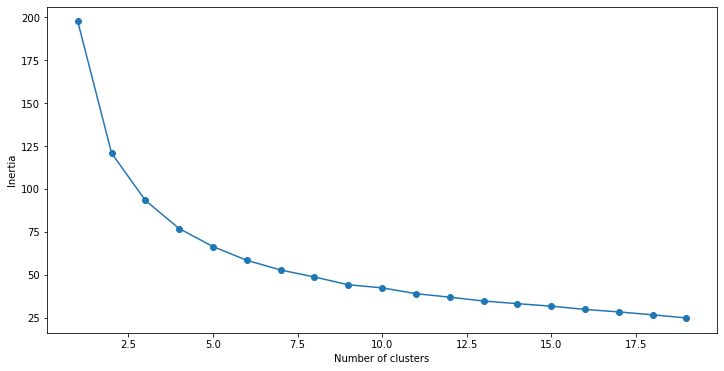

In [24]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init = 'k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [25]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init = 'k-means++')
kmeans.fit(df)
pred = kmeans.predict(df)

C:\Users\dilip-k\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [29]:
frame = pd.DataFrame(pred)

In [30]:
frame.value_counts()

3    65
0    53
2    48
1    30
4    14
dtype: int64